In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [23]:
dy2 = "/glade/work/sturbeville/dyamond2/means/"
dy2olr = dy2+"TWP_meanOLR_DY2_models.nc"
dy2swu = dy2+"TWP_meanSWU_DY2_models.nc"
dy2_models=["ICONr0.1deg","SAMr0.1deg","SCREAMr0.1deg","GEOSr0.1deg","NICAM","SHiELDr0.1deg"]
dy_olr = xr.open_dataset(dy2olr)
dy_swu = xr.open_dataset(dy2swu)
dy_olr = dy_olr.drop("UM").drop("IFS").drop("ARPr0.1deg")
dy_swu = dy_swu.drop("UM").drop("ARPr0.1deg")


In [26]:
for i,v in enumerate(dy2_models):
    print(i,v)
    print(dy_olr[v].values)

0 ICONr0.1deg
237.69278
1 SAMr0.1deg
232.756
2 SCREAMr0.1deg
245.47029
3 GEOSr0.1deg
223.22758
4 NICAM
216.49577
5 SHiELDr0.1deg
219.1253


In [4]:
dyolrmean = dy_olr.to_array().mean()
dyswumean = dy_swu.to_array().mean()
dyolrstd = dy_olr.to_array().std()
dyswustd = dy_swu.to_array().std()
print(dyolrstd, dyswustd)

# for m in dy2_models:
#     plt.scatter(dy_olr[m], dy_swu[m], label=m.split("r")[0])
# plt.scatter(dyolrmean, dyswumean, color='k', s=100)
# plt.plot([dyolrmean]*2, [dyswumean-dyswustd,dyswumean+dyswustd], color='k')
# plt.plot([dyolrmean-dyolrstd,dyolrmean+dyolrstd], [dyswumean]*2, color='k')

# plt.legend()
# plt.grid(True)
# plt.close()

<xarray.DataArray ()>
array(10.39254665) <xarray.DataArray ()>
array(17.7776413)


In [7]:
runs = ["f_default", "g_halfsed","g_2xsed","g_halfdep","g_2xdep",
        "h_halfsed_all","h_2xsed_all","h_halfdep_all","h_2xdep_all", 
        "i_lsascent_a","j_304K"]
run_names = ["Default",
             "1/2x sedimentation","2x sedimentation", 
             "1/2x deposition","2x deposition",
             "1/2x sed_all", "2x sed_all",
             "1/2x dep_all", "2x dep_all",
             "LS ascent", 
             "Warmed SST", "Cooled SST"]
colors = ["darkred","lightskyblue","mediumblue",
          "lightgreen","darkgreen",
          "paleturquoise","darkblue",
          "palegreen","darkgreen",
          "darkviolet", 
          "orangered","sandybrown"]
markers = ["o","s","s","s","s","D","D","D","D","x","^","v"]
hl0 = 4
hl1 = 5

nt = 60*24+1
print(nt//24," days ({})".format(nt) )
run_dir = "/glade/scratch/sturbeville/DPSCREAM_simulations/"
qsmall=0
plot_type="OLRvsSWU" # OLRvsASR, OLRvsSWU, LWvsSWCRE, IWPvsLWCRE

60  days (1441)


0 Default 246.20372 64.92868
1 1/2x sedimentation 244.87044 63.580296
2 2x sedimentation 246.62614 65.49079
3 1/2x deposition 246.02043 64.76112
4 2x deposition 246.37108 64.735565
5 1/2x sed_all 227.35506 74.191895
6 2x sed_all 265.26294 53.886536
7 1/2x dep_all 247.2222 65.171326
8 2x dep_all 247.05197 63.427666
9 LS ascent 240.24475 66.56616
10 Warmed SST 256.23596 59.485233
save as plots/OLRvsSWU_scatter_runs_all.png


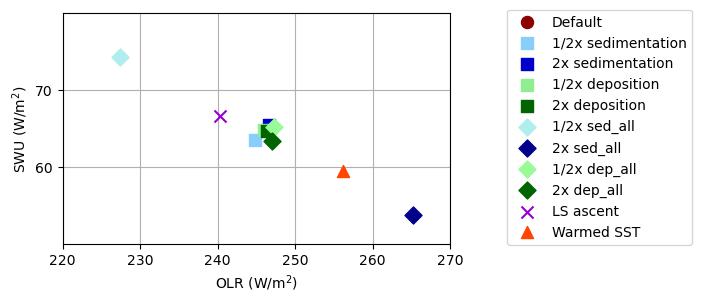

In [30]:
fig, ax = plt.subplots(1,1,figsize=(5,3))
savename="runs_all"
do_dyamond=False
zoomed=False
for i in range(len(runs)):
    ds = xr.open_dataset(run_dir+"scream_dp_RCE_SMALL_3km_{}/run/scream_dp_RCE_SMALL_3km_{}.eam.h1.2000-01-01-00000.nc".format(runs[i],runs[i]))
    ds = ds.isel(time=slice(-nt, -1))
    var_dict = {}
    if plot_type=="OLRvsASR":
        x = ds.FLUT.mean()
        y = ds.FSNT.mean()
    elif plot_type=="OLRvsSWU":
        x = ds.FLUT.mean()
        y = ds.FSUTOA.mean()
    elif plot_type=="LWvsSWCRE":
        x = (ds.FLUTC - ds.FLUT).mean() # LWCRE = OLRCS - OLR
        y = -(ds.FSUTOA-ds.FSUTOAC).mean() # SWCRE = - (RSW - RSWCS)
    elif plot_type=="IWPvsLWCRE":
        x = (ds.FLUTC - ds.FLUT).mean() # LWCRE = OLRCS - OLR
        y = (ds.TGCLDIWP.mean())*1000 #g/m2
    elif plot_type=="NIvsLWCRE":
        x = (ds.FLUTC - ds.FLUT).mean() # LWCRE = OLRCS - OLR
        y = ds.NUMICE.mean()
        
    # plot
    # if i==0 or i==hl0 or i==hl1:
    c = colors[i]
    a=1
    # savename = savename + runs[i].upper() + "-"
    # else:
    #     c="gray"
    #     a=0.4
    #     savename = savename + runs[i].lower() + "-"
    print(i,run_names[i],x.values,y.values)
    ax.scatter(x,y, label=run_names[i], c=c, alpha=a, marker=markers[i], s=75)
fig.legend(loc=6, bbox_to_anchor=(1,0.5))
ax.grid(True)
if plot_type=="OLRvsASR":
    ax.axis('equal')
    ax.set(xlim=[244,250], ylim=[338,344], xticks=np.arange(244,250.5,1))
    ax.set_xlabel("OLR (W/m2)")
    ax.set_ylabel("ASR (W/m2)")
elif plot_type=="OLRvsSWU":
    ax.axis('equal')
    if zoomed:
        ax.set(xlim=[242,248], ylim=[61,67], 
               xticks=np.arange(243,249.1,1),
               yticks=np.arange(61,67.1,1))
        savename += "_zoomed"
    else:
        ax.set(xlim=[220,270], ylim=[50,80],
               yticks=np.arange(50,80.5,10))
    ax.set_xlabel("OLR (W/m$^2$)")
    ax.set_ylabel("SWU (W/m$^2#$)")
elif plot_type=="LWvsSWCRE":
    ax.set_xlim([25,31])
    ax.set_ylim([-38,-33])
    ax.set_xlabel("LW CRE (W/m2)")
    ax.set_ylabel("SW CRE (W/m2)")
    ax.axis('equal')
elif plot_type=="IWPvsLWCRE":
    ax.set_xlim([25,31])
    ax.set_ylim([70,200])
    # ax.set_ylim([1e-7,1e4])
    # ax.set_yscale("log")
    ax.set_xlabel("LW CRE (W/m2)")
    ax.set_ylabel("IWP (g/m2)")
    ax.axis('equal')
if do_dyamond:
    print("do dy")
    savename +="_dyamond"
    for j,var in enumerate(dy2_models):
        plt.scatter(dy_olr[var].values, dy_swu[var].values, color='grey', alpha=0.5, s=30)
    plt.scatter(dyolrmean, dyswumean, color='k', s=100)
    plt.plot([dyolrmean]*2, [dyswumean-dyswustd,dyswumean+dyswustd], color='k')
    plt.plot([dyolrmean-dyolrstd,dyolrmean+dyolrstd], [dyswumean]*2, color='k')
ax.set_axisbelow(True)
# ax.set_title("Spatiotemporal average over last {} days & SMALL domain".format(nt//24))
print("save as plots/{}_scatter_{}.png".format(plot_type, savename))
plt.savefig("plots/{}_scatter_{}.png".format(plot_type, savename), 
            bbox_inches='tight',
            pad_inches=1, dpi=300)
plt.show()